# Seoul Crime EDA

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.style.use("ggplot")
from typing import List
import numpy as np

In [23]:
df = pd.read_csv("data/자치구별5대범죄/01-20_자치구별_5대범죄.csv")
assert df.year.dtype == int

df_quota = pd.read_csv(
    "./data/경찰청_경찰서별_경찰관현황/2014-2021_서울_경찰서별_정원.csv")
assert df_quota.ds.dtype == int

df_cctv = pd.read_csv(
    "data/서울시CCTV설치운영현황/서울시CCTV연도별신규설치수.csv",
    index_col=0,
)
df_cctv = df_cctv.drop("2012년 이전")
df_cctv["종로구"] = df_cctv["종로구"].fillna(-1).astype(int).replace(-1, pd.NA)
df_cctv.index = df_cctv.index.map(lambda x:  int(x[:4]))
df_cctv




,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2012,<NA>,114,71,144,57,0,21,78,0,22,...,122,216,0,136,24,84,73,67,59,27
2013,<NA>,87,234,208,100,14,253,170,22,2,...,104,349,174,238,25,431,79,66,90,227
2014,195,77,125,107,187,16,72,229,61,145,...,202,187,80,123,503,439,70,580,85,49
2015,150,236,221,325,98,115,132,322,124,172,...,199,268,361,209,128,609,562,830,214,154
2016,0,240,298,255,52,804,155,594,251,123,...,168,326,133,248,253,622,504,1293,176,202
2017,261,372,351,967,675,814,153,890,29,129,...,506,540,196,311,271,688,1041,988,241,273
2018,85,386,125,415,465,201,174,867,391,222,...,259,488,539,658,300,674,417,745,541,377
2019,9,155,307,490,712,218,1049,714,1078,210,...,457,434,367,65,322,595,339,791,1073,356
2020,200,361,617,472,175,223,934,253,656,184,...,356,415,513,1213,419,331,433,926,235,614
2021,0,403,228,283,655,219,448,404,470,593,...,317,533,48,283,20,236,556,516,143,262


In [21]:
df_quota

,ds,officeName,quota
0,2014,중부,497
1,2014,종로,620
2,2014,남대문,472
3,2014,서대문,648
4,2014,혜화,468
...,...,...,...
243,2021,노원,799
244,2021,방배,350
245,2021,은평,456
246,2021,도봉,553


In [68]:
df

,year,gu,crimeName,oa,crimeNum,precinct,quota_0,quota_1,quota_2,cctv_0,cctv_1,cctv_2,crimeNum_1
0,2001,강남구,"강간,추행",arrest,108,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
1,2001,강남구,"강간,추행",occur,157,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
2,2001,강남구,강도,arrest,151,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
3,2001,강남구,강도,occur,217,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
4,2001,강남구,살인,arrest,23,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,2020,중랑구,살인,occur,10,['중랑'],749,753,748,934,1049,174,10.0
4998,2020,중랑구,절도,arrest,889,['중랑'],749,753,748,934,1049,174,908.0
4999,2020,중랑구,절도,occur,1506,['중랑'],749,753,748,934,1049,174,1666.0
5000,2020,중랑구,폭력,arrest,1724,['중랑'],749,753,748,934,1049,174,2104.0


In [72]:
df.index = pd.MultiIndex.from_frame(df[["oa", "gu", "crimeName", "year"]])

In [75]:
df

,,,,year,gu,crimeName,oa,crimeNum,precinct,quota_0,quota_1,quota_2,cctv_0,cctv_1,cctv_2,crimeNum_1
oa,gu,crimeName,year,,,,,,,,,,,,,
arrest,강남구,"강간,추행",2001,2001,강남구,"강간,추행",arrest,108,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
occur,강남구,"강간,추행",2001,2001,강남구,"강간,추행",occur,157,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
arrest,강남구,강도,2001,2001,강남구,강도,arrest,151,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
occur,강남구,강도,2001,2001,강남구,강도,occur,217,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
arrest,강남구,살인,2001,2001,강남구,살인,arrest,23,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
occur,중랑구,살인,2020,2020,중랑구,살인,occur,10,['중랑'],749,753,748,934,1049,174,10.0
arrest,중랑구,절도,2020,2020,중랑구,절도,arrest,889,['중랑'],749,753,748,934,1049,174,908.0
occur,중랑구,절도,2020,2020,중랑구,절도,occur,1506,['중랑'],749,753,748,934,1049,174,1666.0


In [26]:
class CrimeAnalysis:
    def __init__(
        self,
        df: pd.DataFrame, 
        df_quota: pd.DataFrame, 
        df_cctv: pd.DataFrame, 
        quota_shift: int=3,
        cctv_shift: int=3,
    ) :
        # Merged with df_quota
        for shift in range(quota_shift):
            df[f"quota_{shift}"] = pd.NA
            for i, row in df.iterrows():
                year: int = row.year
                office: List[str] = eval(row.precinct)
                query = df_quota[(df_quota.ds == (year - shift))&(df_quota.officeName.isin(office))]
                if len(query) > 0 :
                    df[f"quota_{shift}"][i] = query.quota.sum()

        # Merged with df_cctv
        for shift in range(cctv_shift):
            df[f"cctv_{shift}"] = pd.NA
            for i, row in df[df.year >= 2012+shift].iterrows():
                df.loc[i, f"cctv_{shift}"] = df_cctv.loc[row.year - shift, row.gu]

        self.df: pd.DataFrame = df
        self.crimeNames: List[str] = self.df.crimeName.unique().tolist()
        self.colours: List[str] = ["red", "blue", "magenta", "navy", "purple"]
        

    def visualize(self, x: str, shift: List[int]=[0], occur=True, arrest=True):
        if type(shift) == int :
            shift = [shift]

        for i, crime in enumerate(self.crimeNames):
            fig, ax = plt.subplots(figsize=(15, 10))
            legend = []
            temp = self.df[(self.df.crimeName  == crime ) &(self.df.oa == "occur")  ]
            if occur:
                for j in shift:
                    XY = temp[[f"{x}_{j}", "crimeNum"]].dropna()
                    XY.columns = ["x", "y"]
                    ax.scatter(XY.x, XY.y, s=35, alpha=.9)
                    legend += [f"{crime}_발생수/{x}_{j}year_ago"] 

            if arrest:
                temp = self.df[(self.df.crimeName == crime ) & (self.df.oa == "arrest")]
                for j in shift:
                    XY = temp[[f"{x}_{j}", "crimeNum"]].dropna()
                    XY.columns = ["x", "y"]
                    ax.scatter(XY.x, XY.y,  s=35, alpha=.9, marker="x")
                    legend += [f"{crime}_검거수/{x}_{j}year_ago"]
            
            ax.legend(legend)
            ax.set_xlabel(x, fontsize=20)
            ax.set_title("   " + crime, fontsize=48, ha="left", va="center", loc="left")
            plt.show()

In [27]:
analysis = CrimeAnalysis(df, df_quota, df_cctv)

/tmp/ipykernel_4022/2180182837.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"quota_{shift}"][i] = query.quota.sum()
/tmp/ipykernel_4022/2180182837.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"quota_{shift}"][i] = query.quota.sum()
/tmp/ipykernel_4022/2180182837.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"quota_{shift}"][i] = query.quota.sum()


In [29]:
analysis.df

,year,gu,crimeName,oa,crimeNum,precinct,quota_0,quota_1,quota_2,cctv_0,cctv_1,cctv_2
0,2001,강남구,"강간,추행",arrest,108,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2001,강남구,"강간,추행",occur,157,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,2001,강남구,강도,arrest,151,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,2001,강남구,강도,occur,217,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,2001,강남구,살인,arrest,23,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
4997,2020,중랑구,살인,occur,10,['중랑'],749,753,748,934,1049,174
4998,2020,중랑구,절도,arrest,889,['중랑'],749,753,748,934,1049,174
4999,2020,중랑구,절도,occur,1506,['중랑'],749,753,748,934,1049,174
5000,2020,중랑구,폭력,arrest,1724,['중랑'],749,753,748,934,1049,174


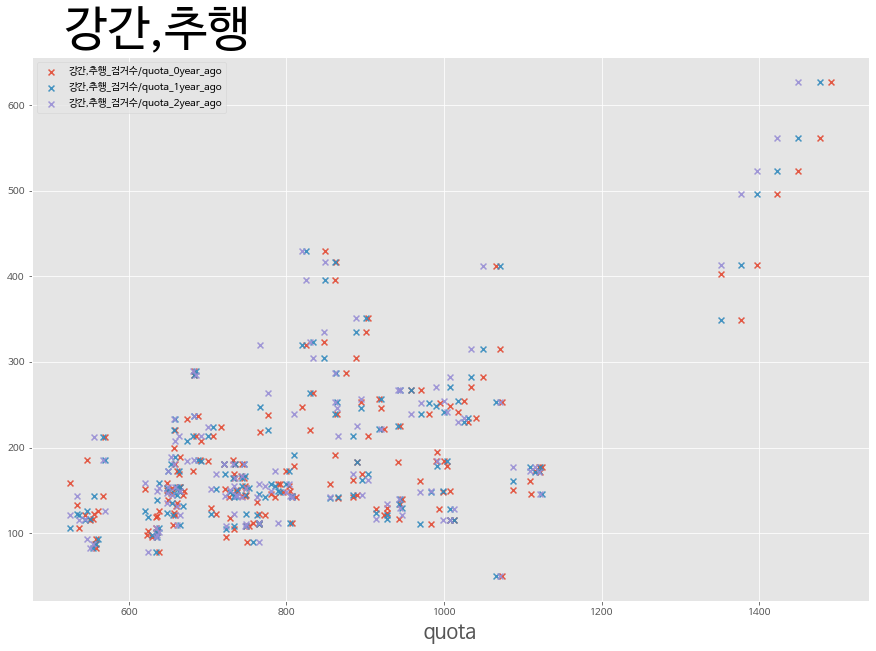

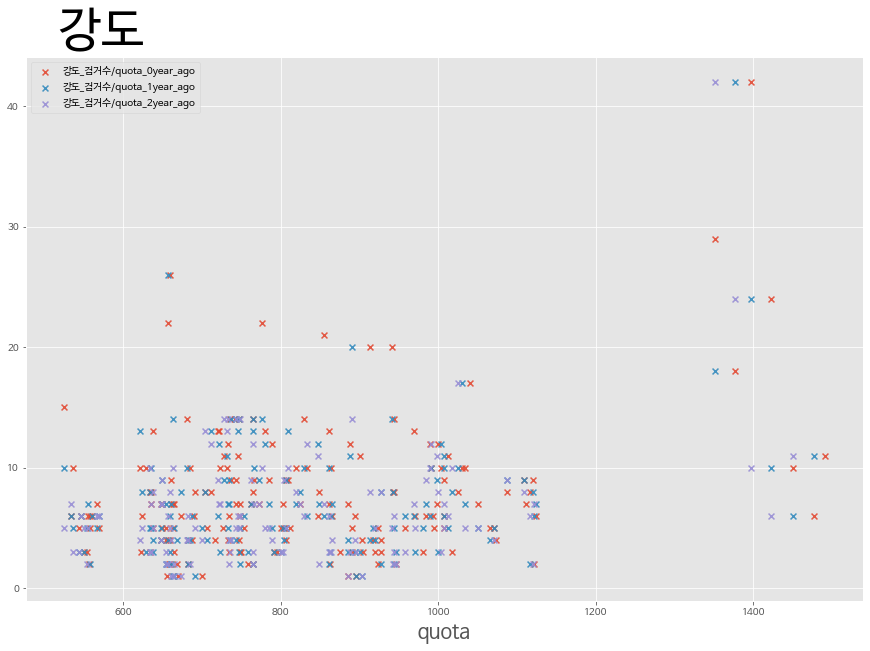

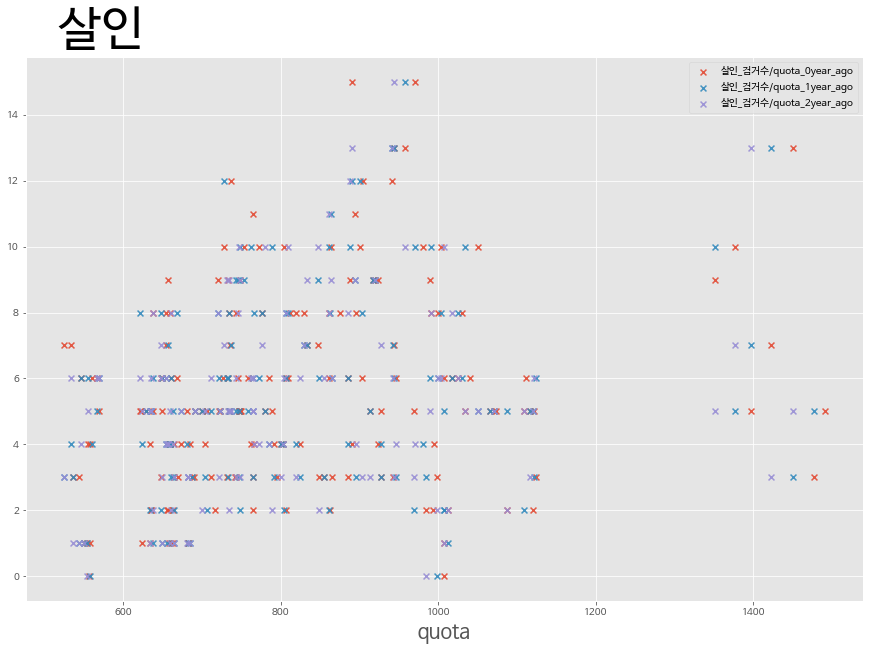

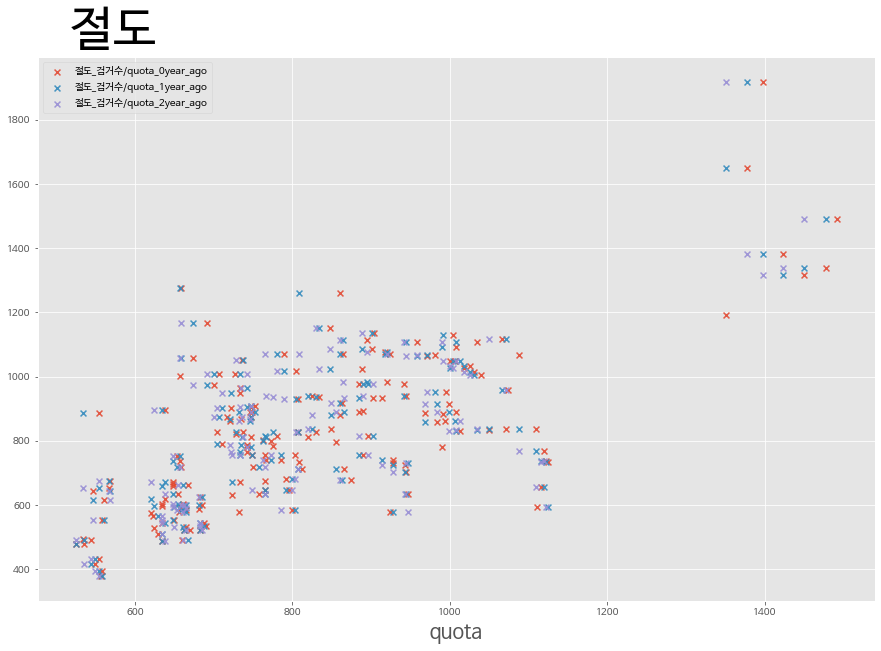

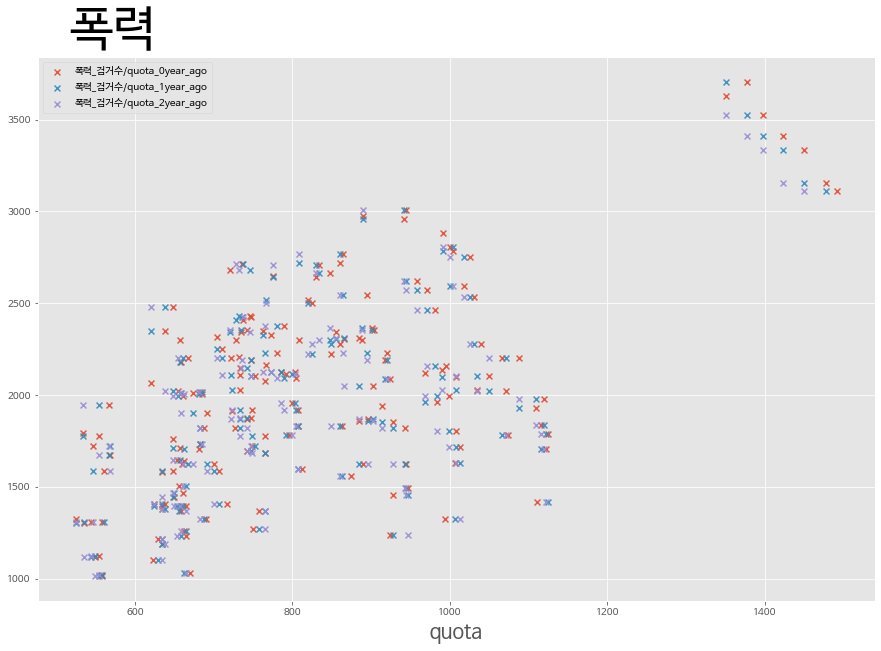

In [75]:
analysis.visualize(x="quota", shift=[0, 1, 2, ], occur=False)

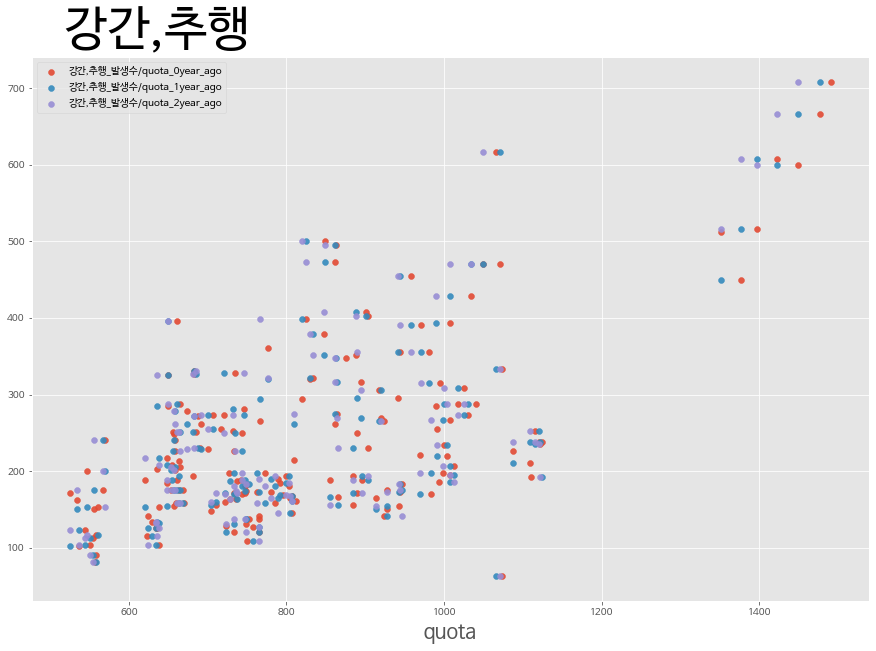

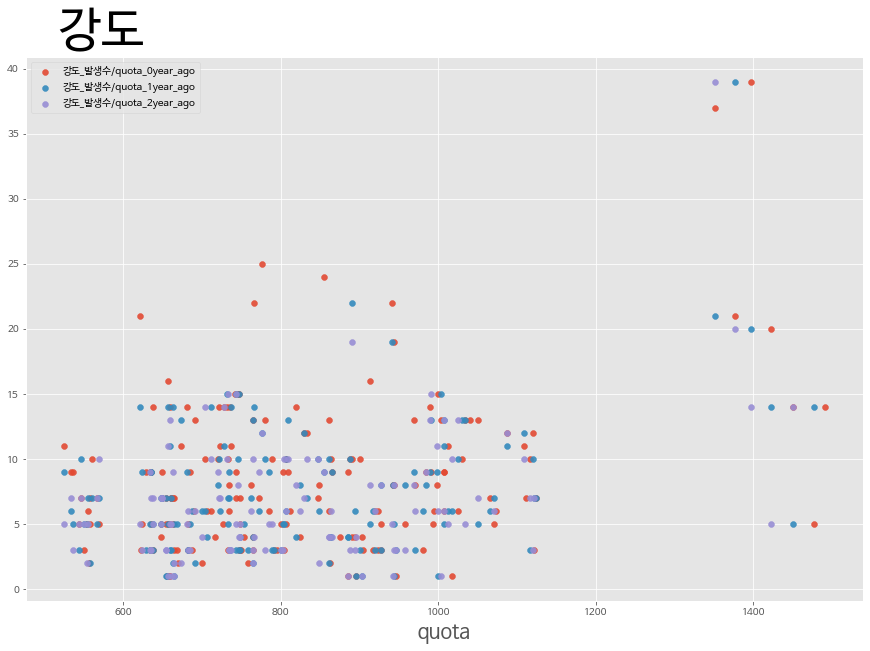

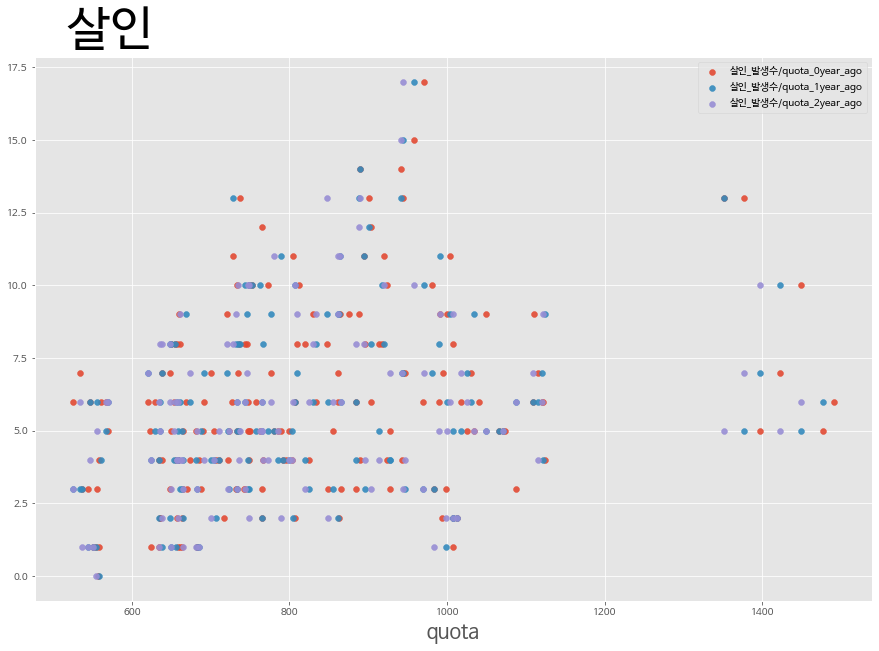

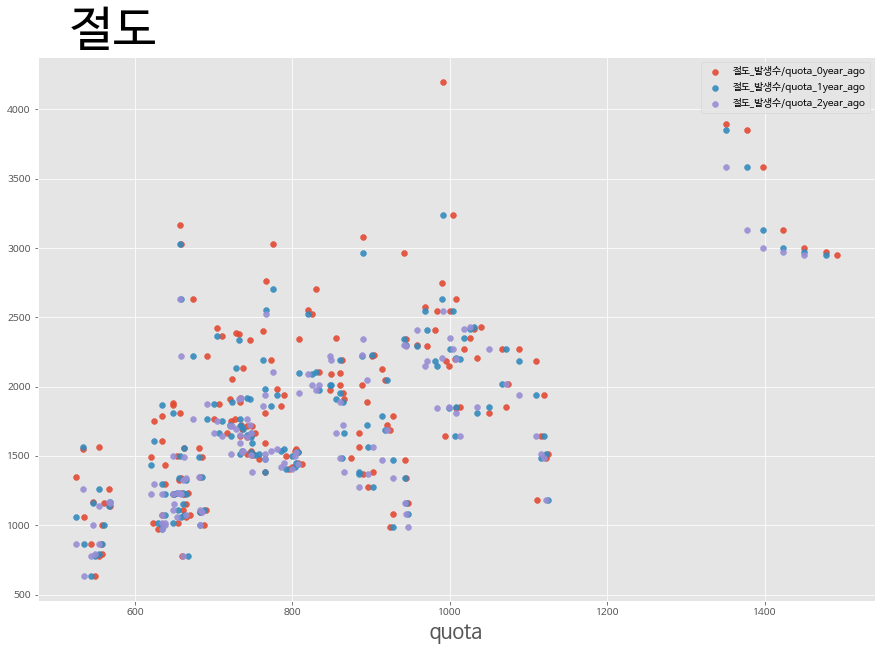

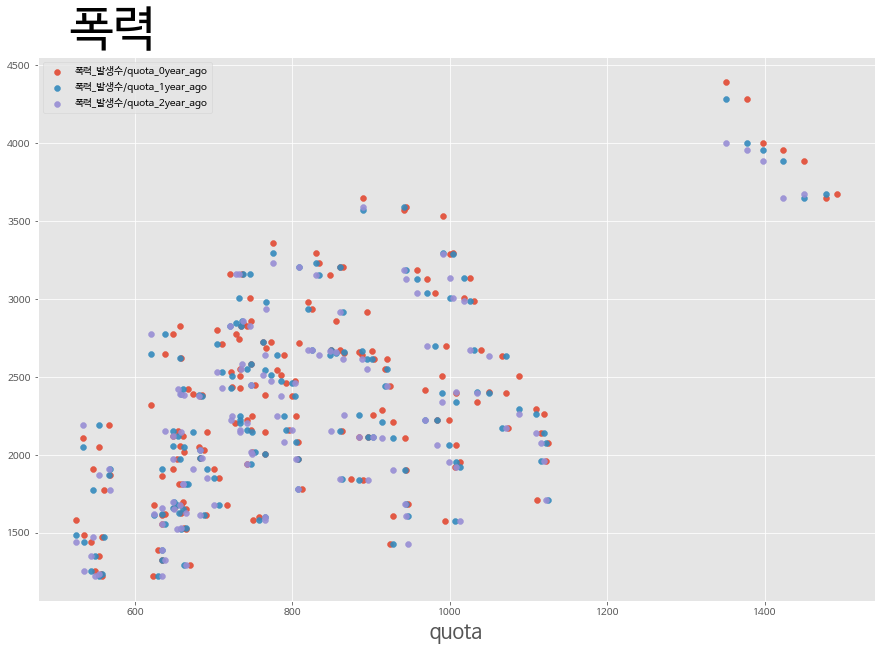

In [81]:
analysis.visualize(x="quota", shift=[0, 1, 2, ], arrest=False)

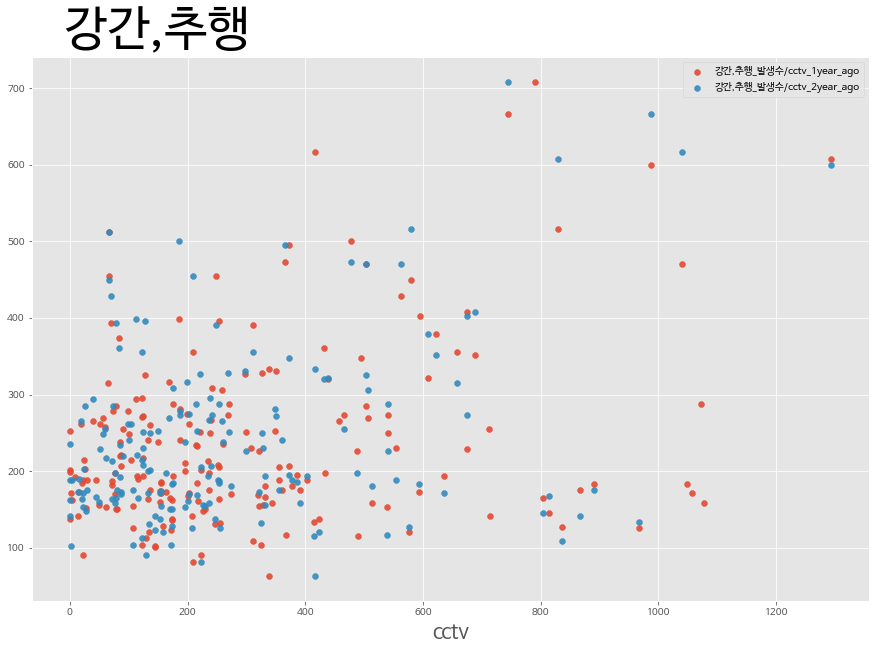

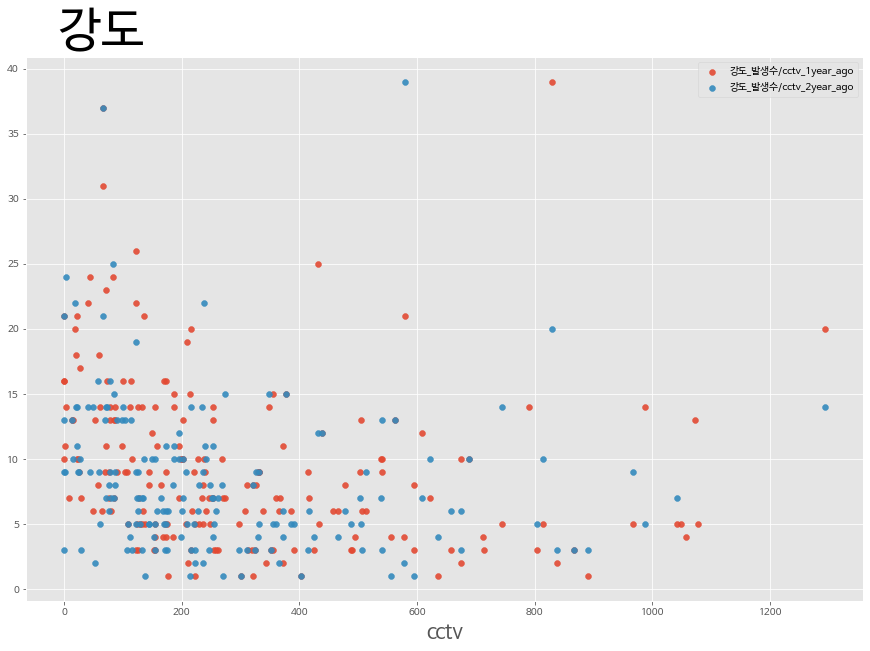

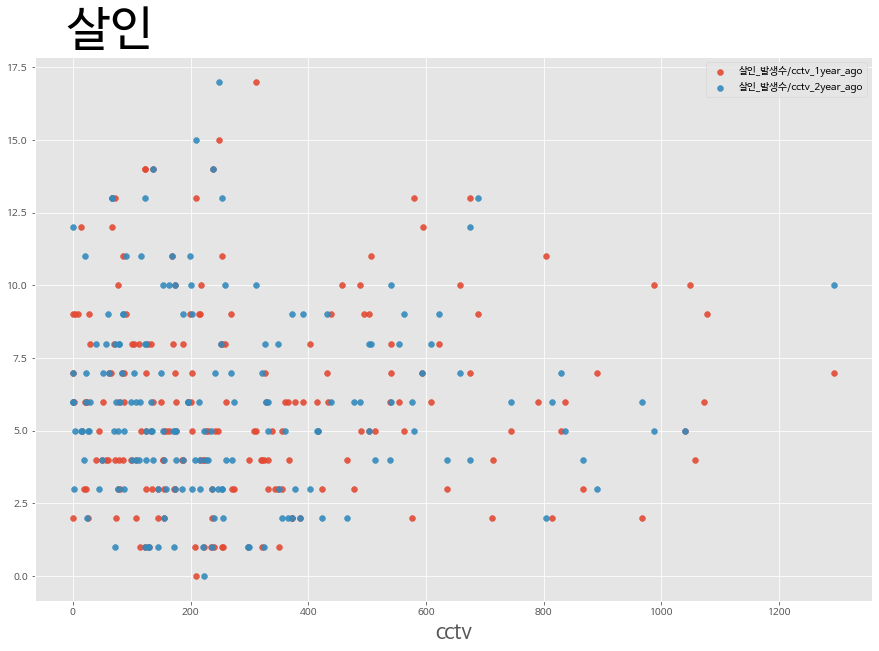

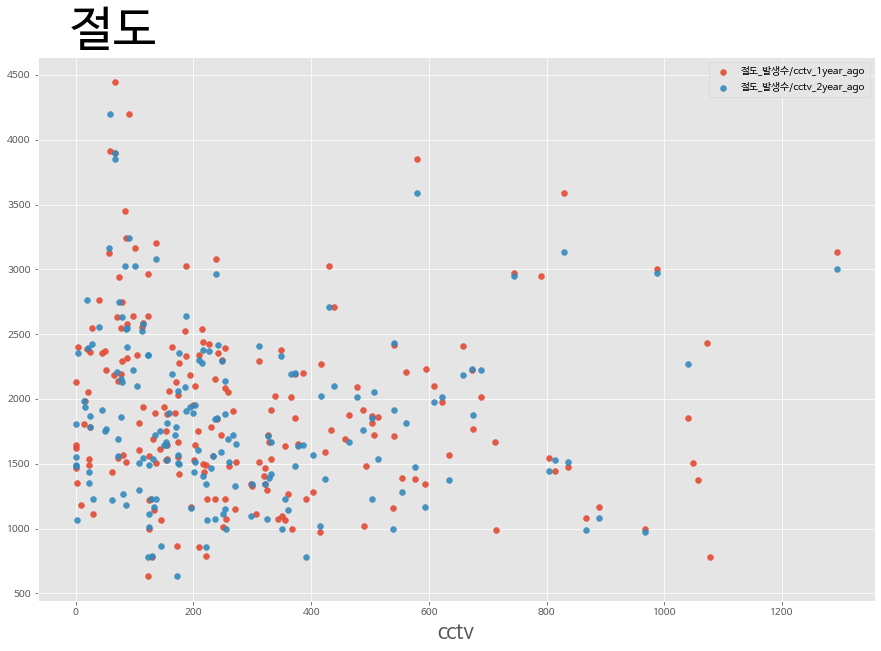

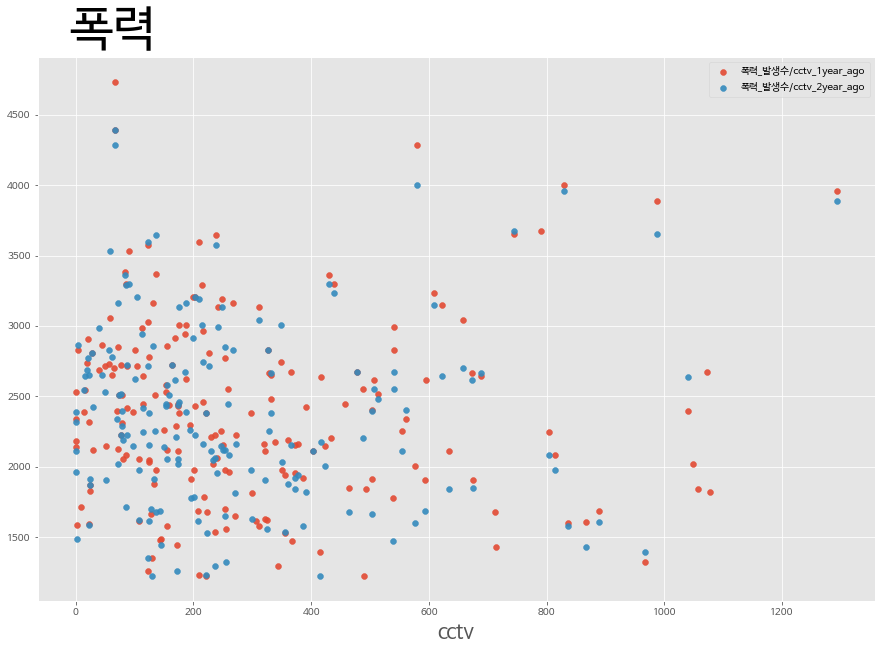

In [82]:
analysis.visualize(x="cctv", shift=[1,2], arrest=False)

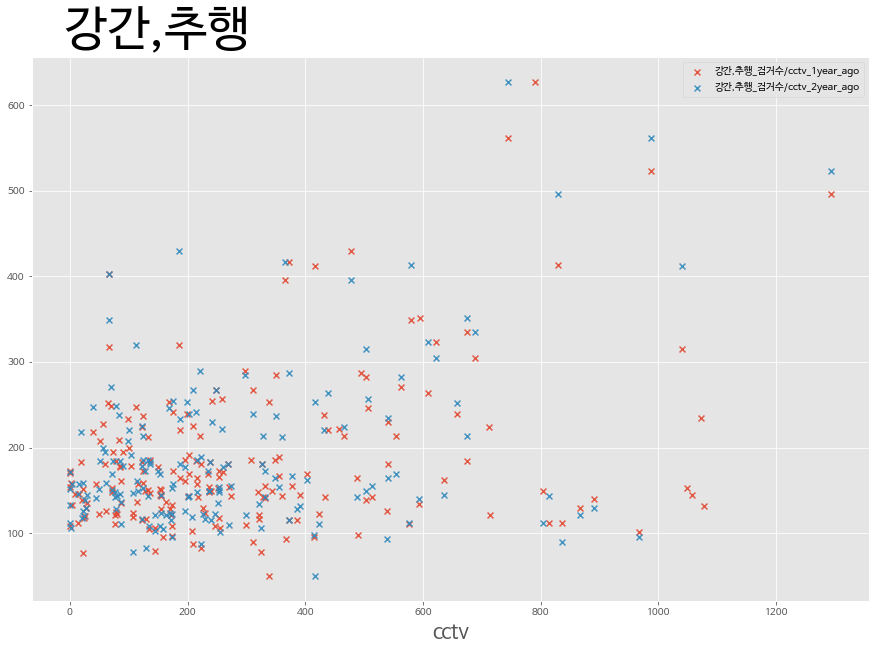

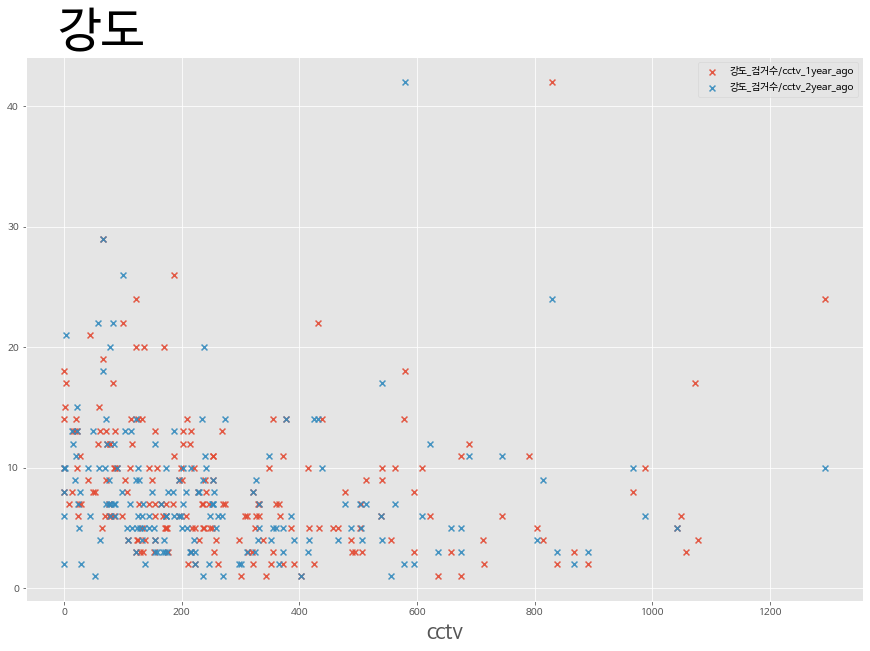

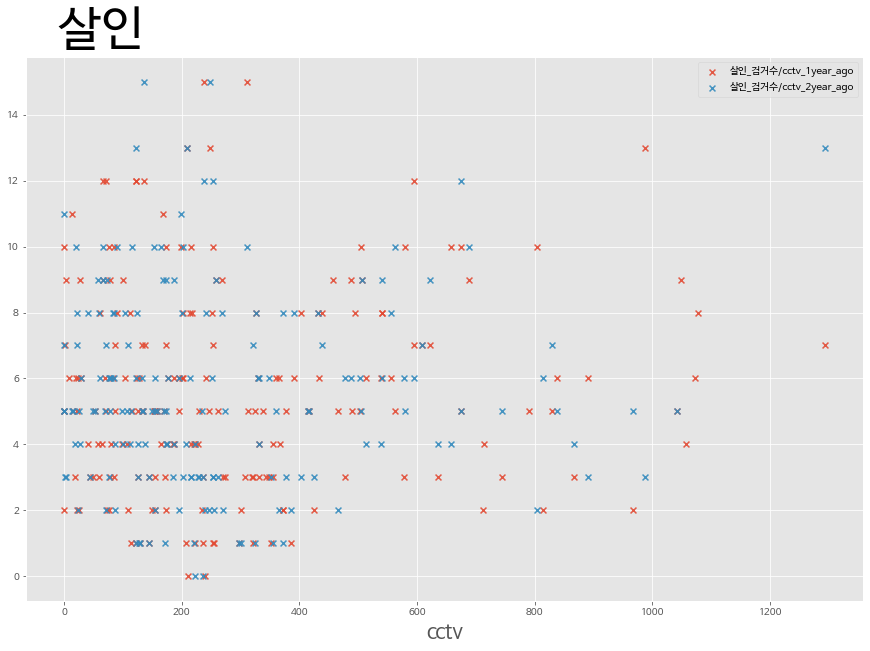

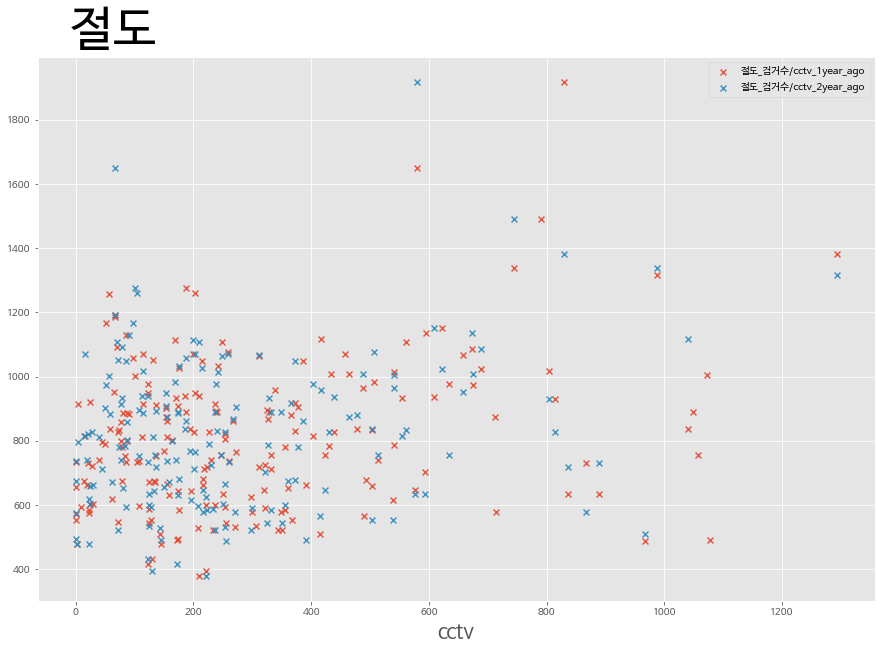

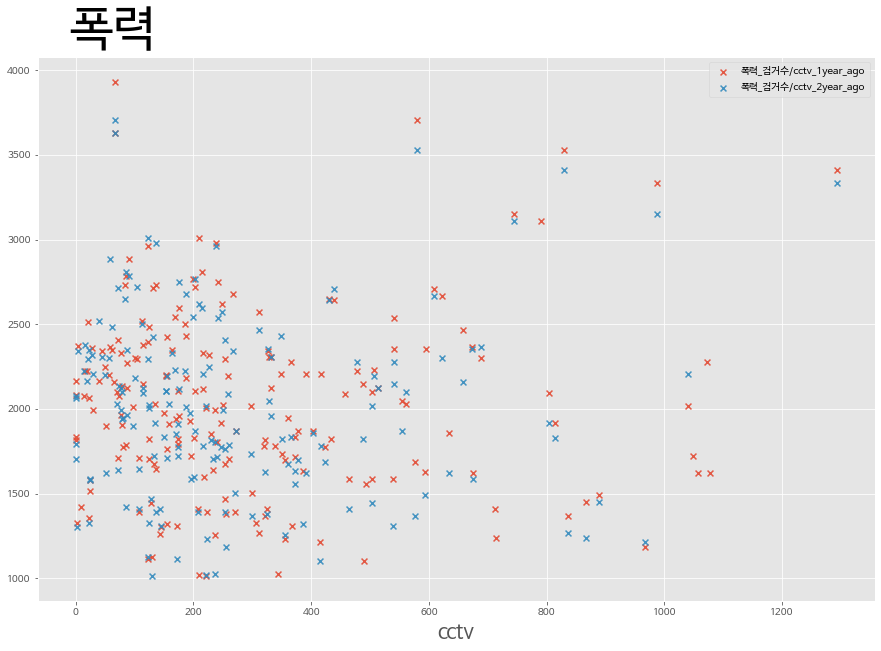

In [83]:
analysis.visualize(x="cctv", shift=[1,2], occur=False)

In [30]:
df_oc = df[df.oa == "occur"]

In [56]:
df["crimeNum_1"] = np.nan
for i, row in df.iterrows():
    temp = df[
        (df.year == row.year - 1 ) &
        (df.oa == row.oa) &
        (df.gu == row.gu) &
        (df.crimeName == row.crimeName)
    ]

    if len(temp) == 0 :
        continue
    df.crimeNum_1[i] = temp.crimeNum.values[0]

df

/tmp/ipykernel_4022/632013578.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.crimeNum_1[i] = temp.crimeNum.values[0]


,year,gu,crimeName,oa,crimeNum,precinct,quota_0,quota_1,quota_2,cctv_0,cctv_1,cctv_2,crimeNum_1
0,2001,강남구,"강간,추행",arrest,108,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
1,2001,강남구,"강간,추행",occur,157,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
2,2001,강남구,강도,arrest,151,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
3,2001,강남구,강도,occur,217,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
4,2001,강남구,살인,arrest,23,"['강남', '수서']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,2020,중랑구,살인,occur,10,['중랑'],749,753,748,934,1049,174,10.0
4998,2020,중랑구,절도,arrest,889,['중랑'],749,753,748,934,1049,174,908.0
4999,2020,중랑구,절도,occur,1506,['중랑'],749,753,748,934,1049,174,1666.0
5000,2020,중랑구,폭력,arrest,1724,['중랑'],749,753,748,934,1049,174,2104.0


In [63]:
import seaborn as sns

<AxesSubplot:xlabel='cctv_diff', ylabel='num_diff'>

/home/hong/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


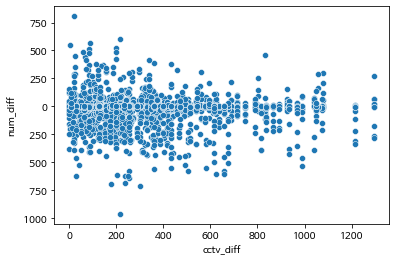

In [77]:
sns.scatterplot(
    data=pd.DataFrame({
        "year": df.year,
        "num_diff" : df.crimeNum - df.crimeNum_1,
        "cctv_diff": df.cctv_0
    }).dropna(),
    x="cctv_diff",
    y="num_diff",


In [ ]:
)

In [39]:
(df_oc.quota_0 - df_oc.quota_1).dropna()

3501    26
3503    26
3505    26
3507    26
3509    26
        ..
4993    -4
4995    -4
4997    -4
4999    -4
5001    -4
Length: 751, dtype: object